In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | corum
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sao mateus do sul
Processing Record 6 of Set 1 | siddipet
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | punganuru
Processing Record 9 of Set 1 | saldanha
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | bacolod
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | lolua
City not found. Skipping...
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | taoudenni
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | atuona
Proc

Processing Record 39 of Set 4 | ostrowiec swietokrzyski
Processing Record 40 of Set 4 | akdepe
Processing Record 41 of Set 4 | mahibadhoo
Processing Record 42 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 43 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | tabulbah
City not found. Skipping...
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | belomorsk
Processing Record 50 of Set 4 | boli
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | aden
Processing Record 3 of Set 5 | deputatskiy
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | amapa
Processing Record 6 of Set 5 | warqla
City not found. Skipping...
Processing Record 7 of Set 5 | hitoyoshi
Processing Record 8 of Set 5 | ahipara
Processing Record 9 of Set 5 | lavre

Processing Record 23 of Set 8 | bafq
Processing Record 24 of Set 8 | berlevag
Processing Record 25 of Set 8 | wahran
City not found. Skipping...
Processing Record 26 of Set 8 | vila velha
Processing Record 27 of Set 8 | kaitangata
Processing Record 28 of Set 8 | odesskoye
Processing Record 29 of Set 8 | chicama
Processing Record 30 of Set 8 | yaan
Processing Record 31 of Set 8 | vikulovo
Processing Record 32 of Set 8 | lucapa
Processing Record 33 of Set 8 | iqaluit
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | shenjiamen
Processing Record 36 of Set 8 | dudinka
Processing Record 37 of Set 8 | sola
Processing Record 38 of Set 8 | mildura
Processing Record 39 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 8 | general roca
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | sembakung
Processing Record 43 of Set 8 | kodinar
Processing Record 44 of Set 8 | kirkenaer
Processing Record 45 of Set 8 | port lincoln
Proces

Processing Record 15 of Set 12 | sao felix do xingu
Processing Record 16 of Set 12 | mabaruma
Processing Record 17 of Set 12 | baillif
Processing Record 18 of Set 12 | villeneuve-sur-lot
Processing Record 19 of Set 12 | nguiu
City not found. Skipping...
Processing Record 20 of Set 12 | fomboni
Processing Record 21 of Set 12 | harlingen
Processing Record 22 of Set 12 | yarada
Processing Record 23 of Set 12 | dinan
Processing Record 24 of Set 12 | labrea
Processing Record 25 of Set 12 | antipino
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | solnechnyy
Processing Record 28 of Set 12 | kardla
Processing Record 29 of Set 12 | tongren
Processing Record 30 of Set 12 | busca
Processing Record 31 of Set 12 | yomitan
City not found. Skipping...
Processing Record 32 of Set 12 | hualmay
Processing Record 33 of Set 12 | chipurupalle
Processing Record 34 of Set 12 | ordynskoye
Processing Record 35 of Set 12 | mackay
Processing Record 36 of Set 1

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,-5.58,100,96,2.24,RU,2021-10-27 02:12:56
1,Mataura,-46.1927,168.8643,64.04,68,93,3.96,NZ,2021-10-27 02:11:50
2,Corum,40.5000,34.7500,34.32,85,0,3.78,TR,2021-10-27 02:12:56
3,Ushuaia,-54.8000,-68.3000,40.66,65,20,16.11,AR,2021-10-27 02:11:21
4,Sao Mateus Do Sul,-25.8742,-50.3828,58.12,94,99,3.44,BR,2021-10-27 02:12:57
5,Siddipet,18.1000,78.8500,68.23,70,2,4.25,IN,2021-10-27 02:12:57
6,East London,-33.0153,27.9116,67.15,85,100,18.86,ZA,2021-10-27 02:12:57
7,Punganuru,13.3667,78.5833,70.20,86,71,3.65,IN,2021-10-27 02:12:58
8,Saldanha,-33.0117,17.9442,63.79,68,77,7.45,ZA,2021-10-27 02:12:58
9,Bambous Virieux,-20.3428,57.7575,73.22,65,54,13.24,MU,2021-10-27 02:12:58


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2021-10-27 02:12:56,71.9667,102.5000,-5.58,100,96,2.24
1,Mataura,NZ,2021-10-27 02:11:50,-46.1927,168.8643,64.04,68,93,3.96
2,Corum,TR,2021-10-27 02:12:56,40.5000,34.7500,34.32,85,0,3.78
3,Ushuaia,AR,2021-10-27 02:11:21,-54.8000,-68.3000,40.66,65,20,16.11
4,Sao Mateus Do Sul,BR,2021-10-27 02:12:57,-25.8742,-50.3828,58.12,94,99,3.44
...,...,...,...,...,...,...,...,...,...
532,Hualmay,PE,2021-10-27 02:15:35,-11.0964,-77.6139,63.25,83,100,9.55
533,Chipurupalle,IN,2021-10-27 02:15:35,18.3000,83.5667,74.08,75,2,6.44
534,Ordynskoye,RU,2021-10-27 02:15:35,54.3656,81.8994,28.13,70,96,7.78
535,Mackay,AU,2021-10-27 02:15:36,-21.1500,149.2000,91.69,67,0,9.42


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

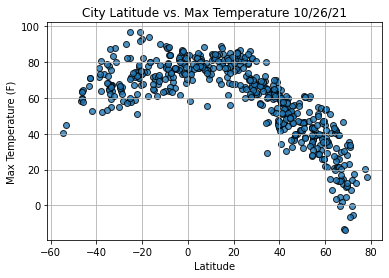

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

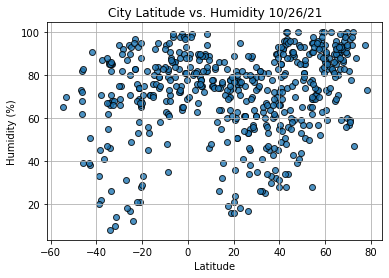

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

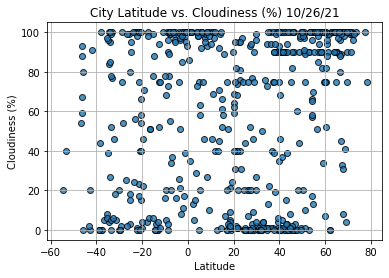

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

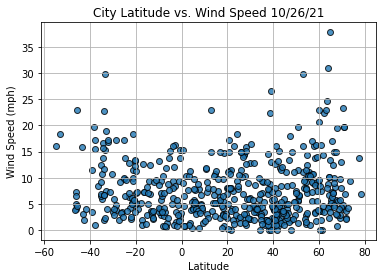

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()